1. Version  : 1
2. Time     : 15th May
3. Author   : Hui Zhang
4. Function : Adam 2 hidden layer relu DNN on Fashion MNIST
5. Structure: 2 hidden layer with 2000 nodes in each layer
6. Relation paper: PBCD method for 0/1 DNN

In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
def createNOW_model(directory1):
  chanDim = -1
  input_shape = (28, 28, 1)
  model_original = load_model(directory1)
  #model_original = load_model(CNN_weight_path)
  model = Sequential()
  # Layer 1 Conv2D
  cnn_layer0 = Conv2D(filters = 32, kernel_size = 5, strides = 1, 
                      activation = 'relu', input_shape = input_shape, name = "cn0")
  cnn_layer0.trainable=False
  model.add(cnn_layer0)
  #filters determines the number of kernels to convolve with the input volume. 
  #Each of these operations produces a 2D activation map.

  cnn_layer1= Conv2D(filters = 32, kernel_size = 5, strides = 1, use_bias=False, name = "cn1")
  cnn_layer1.trainable=False
  model.add(cnn_layer1)

  bat_layer2=BatchNormalization(name = "bat2")
  bat_layer2.trainable=False
  model.add(bat_layer2)

  model.add(Activation('relu', name = 'relu3'))

  model.add(MaxPooling2D(pool_size = 2, strides = 2, name = 'max4'))

  model.add(Dropout(0.25, name = 'drop5')) ############## 需要这一层的输出

  
  cnn_layer6= Conv2D(filters = 64, kernel_size = 3, strides = 1, use_bias=False,
                     activation = 'relu', name = "cn6")
  cnn_layer6.trainable=False
  model.add(cnn_layer6)

  
  cnn_layer65 =  Conv2D(filters = 64, kernel_size = 3, strides = 1, use_bias=False, name = "cn65")
  cnn_layer65.trainable=False
  model.add(cnn_layer65)


  bat_layer6 = BatchNormalization(name = "bat7")
  bat_layer6.trainable=False
  model.add(bat_layer6)

  # Layer 4 Pooling Layer
  model.add(Activation('relu', name = 'relu8'))
  
  model.add(MaxPooling2D(pool_size = 2, strides = 2, name = 'max9'))
  model.add(Dropout(0.25, name='drop10'))

  model.add(Flatten(name='flatten11'))

  model.add(Dense(200, use_bias=False))
  model.add(Activation("relu"))
  model.add(Dense(100, use_bias=False))
  model.add(Activation("relu"))

  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  model.layers[0].set_weights(model_original.layers[0].get_weights())
  model.layers[1].set_weights(model_original.layers[1].get_weights())
  model.layers[2].set_weights(model_original.layers[2].get_weights())
  model.layers[6].set_weights(model_original.layers[6].get_weights())
  model.layers[7].set_weights(model_original.layers[7].get_weights())
  model.layers[8].set_weights(model_original.layers[8].get_weights())
  return model

import numpy as np   # science calculate  instill numpy
import struct  # y???????
# from sklearn.utils import shuffle  # instill scikit-learn/ scikit
import time  
import os  # o??????????
import scipy
from scipy import io
import tensorflow as tf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from tqdm import tqdm, trange
# from tensorflow.keras import keras
from tensorflow.keras.datasets import fashion_mnist
# 导入数据
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,Activation,BatchNormalization,AveragePooling2D,MaxPooling2D
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

directory = ("/content/drive/MyDrive/PBCDcode/FashionMNIST/data/")
directory1 = os.path.join(directory, "prenetwork/fashionCNN.h5")
modelnow_fashion = createNOW_model(directory1)
layer_name = 'flatten11'
intermediate_layer_model = tf.keras.Model(inputs = modelnow_fashion.input,
                                      outputs = modelnow_fashion.get_layer(layer_name).output)
test_images = []
for i in range(100):
  test_0 = intermediate_layer_model(x_test[i*100:(i+1)*100,:,:])
  if i ==0:
    test_images = test_0.numpy().T
  else:
    test_images = np.hstack((test_images, test_0.numpy().T))

train_images = []
for i in range(600):
  train_0 = intermediate_layer_model(x_train[i*100:(i+1)*100,:,:])
  if i ==0:
    train_images = train_0.numpy().T
  else:
    train_images = np.hstack((train_images, train_0.numpy().T))


# train_images = train_images.numpy()
# test_images = test_images.numpy()
np.save(os.path.join(directory, "rawdata/train_images.npy"), train_images.T)
np.save(os.path.join(directory, "rawdata/test_images.npy"), test_images.T)
np.save(os.path.join(directory, "rawdata/train_labels.npy"), y_train)
np.save(os.path.join(directory, "rawdata/test_labels.npy"), y_test)


#Make Pictures#

In [ ]:
def create_all_model(act_my):
  # chanDim = -1
  model = Sequential()
  model.add(Dense(2000, use_bias=False))
  model.add(Activation(act_my))
  model.add(Dense(2000, use_bias=False))
  model.add(Activation(act_my))

  model.add(Dense(10, activation='softmax', use_bias=False))
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  return model

from keras.backend import sigmoid
def swish(x, beta = 0.7):
    return (x * sigmoid(beta * x))
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

from keras.layers import LeakyReLU
def Leakeyrelu(x):
    return tf.keras.layers.LeakyReLU(alpha=0.02)(x)
get_custom_objects().update({'Leakeyrelu': Activation(Leakeyrelu)})

directory = ("/content/drive/MyDrive/PBCDcode/FashionMNIST/data/")
x_train = np.load(os.path.join(directory, "rawdata/train_images.npy"))
x_test = np.load(os.path.join(directory, "rawdata/test_images.npy"))
y_train = np.load(os.path.join(directory, "rawdata/train_labels.npy"))
y_test = np.load(os.path.join(directory, "rawdata/test_labels.npy"))


print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

myacti = {0: "relu",
          1: "sigmoid",
          2: "swish",
          3: "selu",
          4: "softsign",
          5: "tanh",
          6: "Leakeyrelu"}
          
for i in range(len(myacti)):
  if i ==0:
    tf.random.set_seed(21)
    directory = os.path.join(os.path.join(directory, "activations"), myacti[i] + "network")
    directory1 = os.path.join(directory, "history1.mat")
    directory2 = os.path.join(directory, "history2.mat")
    if not os.path.exists(directory):
        os.makedirs(directory)

    model_all = create_all_model(myacti[i])
    history1 = model_all.fit(x_train, y_train, epochs= 2, batch_size=128, validation_data=(x_test, y_test))
    # history2 = model_all.fit(x_train, y_train, epochs= 40, batch_size=60000, validation_data=(x_test, y_test))


    # history_dict1 = history1.history
    # history_dict2 = history2.history

    # io.savemat(directory1, history_dict1)
    # io.savemat(directory2, history_dict2)
    # print("========================================================")
    # print("=====================New activation=====================")
    # print("The current activation is: {}, final test acc is: {},".format(
    #     myacti[i], history_dict2['val_accuracy'][-1]))
    # print("========================================================")




  

In [ ]:
def hardmax(x):  # 返回矩阵值 dimision: 10 * 64
    v1 = np.zeros(x.shape)
    v = np.argmax(x, 0)  # tf.argmax(a,1) 每一列最大值位置
    for i in range(x.shape[1]):
        v1[v[i], i] = 1
    return tf.convert_to_tensor(v1, dtype=tf.float32)
def forward_propagation(X, parameters):
    W1 = parameters["W1"]  # W1 维数 （784, 1000）
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    U1 = tf.matmul(tf.transpose(W1), X)  # + b1 * parameters['gamma1']
    # betch_size =16, nx*nx = 784 X为（784，16）, gamma1为nx*nx，X * gamma1的维数和X维数相同
    V1 = U1 * tf.cast(U1 >0, dtype=tf.float32)  # 实现Relu，V1为 (1000，16)为第1隐层的值
    U2 = tf.matmul(tf.transpose(W2), V1)  # + b3    # W3^T为 （10，1000） * parameters['gamma3']
    V2 = U2 * tf.cast(U2 >0, dtype=tf.float32)  # 实现Relu，V1为 (1000，16)为第1隐层的值
    print(W3.shape, V2.shape)
    U3 = tf.matmul(tf.transpose(W3), V2)  # + b3    # W3^T为 （10，1000） * parameters['gamma3']
    V3 = hardmax(U3)  # 输出 维数是2*batch 大小
    cache = {
        "V0": X,
        "U0": X,
        "U1": U1,
        "V1": V1,
        "U2": U2,
        "V2": V2}

    return V3, cache

def save_parameters(parameters, directory):
    for key, val in parameters.items():
        if not os.path.exists(os.path.join(directory, str(key) + '.npy')):
          os.makedirs(os.path.join(directory, str(key) + '.npy'))
        np.save(os.path.join(directory, str(key) + '.npy'), val)
def costloss(V, Y):
    cost = tf.square(tf.norm(V - Y)) / 2
    return cost

directory = ("/content/drive/MyDrive/PBCDcode/FashionMNIST/data/")
filepath = os.path.join(directory, "prenetwork/fashionrobust518.h5")
model_all.save(filepath, overwrite=True, save_format=None, options=None)
model_original = load_model(filepath)
W1 = model_original.layers[0].get_weights()
W1 = W1[0]
W2 = model_original.layers[2].get_weights()
W2 = W2[0]
W3 = model_original.layers[4].get_weights()
W3 = W3[0]
parameters = {"W1": W1,
              "W2": W2,
              "W3": W3}
save_parameters(parameters, os.path.join(directory, "preparameter"))
X = x_test
Y = y_test
aa25, _ = forward_propagation(X.T, parameters)
# print(aa25)
# y_test = np.load(os.path.join(directorybase, "rawdata/test_labels.npy"))

acc = costloss(aa25, Y.T)
print("OUR:{}.".format((10000-acc)/10000))

loss, acc = model_all.evaluate(X, Y, verbose=2)
print("DNN:{}.".format(acc))



(2000, 10) (2000, 10000)
OUR:0.9061999917030334.
313/313 - 1s - loss: 0.2530 - accuracy: 0.9062 - 1s/epoch - 5ms/step
DNN:0.9061999917030334.


[[0.91430002 0.91600001]]
7 37


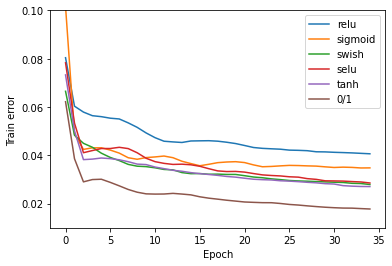

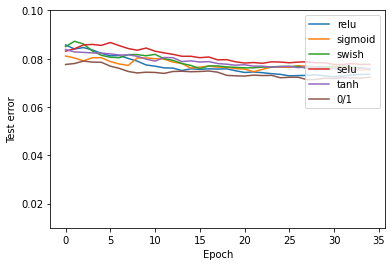

In [7]:
import numpy as np   # science calculate  instill numpy
import struct  # y???????
# from sklearn.utils import shuffle  # instill scikit-learn/ scikit
import time  
import os  # o??????????
import scipy
from scipy import io
import torch as tc
import tensorflow as tf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from tqdm import tqdm, trange
from tensorflow.keras.datasets import fashion_mnist
# 导入数据
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,Activation,BatchNormalization,AveragePooling2D,MaxPooling2D
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
myacti = {0: "relu",
          1: "sigmoid",
          2: "swish",
          3: "selu",
          4: "softsign",
          5: "tanh",
          6: "Leakeyrelu",
          7: "0/1"}
history_train = np.zeros((10,151))
history_test = np.zeros((10,151))
directory = ("/content/drive/MyDrive/PBCDcode/FashionMNIST/data/")
for i in range(7):
  directory0 = os.path.join(os.path.join(directory, "activations"), myacti[i] + "network")
  directory1 = os.path.join(directory0, "history1.mat")
  directory2 = os.path.join(directory0, "history2.mat")
  history_dict1 = io.loadmat(directory1)
  history_dict2 = io.loadmat(directory2)
  c1 = np.append(np.array(history_dict1['accuracy']), np.array(history_dict2['accuracy']))
  c2 = np.append(np.array(history_dict1['val_accuracy']), np.array(history_dict2['val_accuracy']))
  if i == 0:
    print(history_dict1['val_accuracy'])
  # print(history_dict1['accuracy'].shape, history_dict2['accuracy'].shape, c.shape)
  history_train[i,0:len(c1)] = c1
  history_test[i,0:len(c2)] = c2
  # print(i, len(c1))
  # if i == 0:
  #   train1 = np.array(history_dict1['accuracy'])
  #   test1 = np.array(history_dict1['val_accuracy'])


i += 1      
train2 = np.load("/content/drive/MyDrive/PBCDcode/FashionMNIST/data/result/history1.npy")
test2 = np.load("/content/drive/MyDrive/PBCDcode/FashionMNIST/data/result/history2.npy")

history_train[i,0:len(c1)] = c1.reshape((1,len(c1)))
history_test[i,0:len(c2)] = c2.reshape((1,len(c2)))

print(i, len(c1))

for i in range(8):
  if i!= 4 and i!= 6:
    plt.plot(1-history_train[i, 0:35], label= str(myacti[i]))
    plt.xlabel('Epoch')
    plt.ylabel('Train error')
    plt.ylim([0.01, 0.1])
    plt.legend(loc='upper right')

plt.savefig("/content/drive/MyDrive/PBCDcode/FashionMNIST/data/result/Fashiontrainacc.pdf")
plt.show()
# print(history_train[7, 0:30])


for i in range(8):
  if i!= 4 and i!= 6:
    plt.plot(1-history_test[i, 0:35], label= str(myacti[i]))
    plt.xlabel('Epoch')
    plt.ylabel('Test error')
    plt.ylim([0.01, 0.1])
    plt.legend(loc='upper right')

plt.savefig("/content/drive/MyDrive/PBCDcode/FashionMNIST/data/result/Fashiontestacc.pdf")
plt.show()

In [ ]:
print(1-history_test[0:8, 35])
print(1-history_train[0:8, 35])

[0.09420002 0.10000002 0.09500003 0.0977     0.09939998 0.09759998
 0.09450001 0.09450001]
[0.07789999 0.08805001 0.08265001 0.08324999 0.0836333  0.08068335
 0.07779998 0.07779998]


In [ ]:
#history = model.fit(X_train, Y_train, epochs=60, batch_size=1, verbose=2)
# plot metrics
# data_name = "MNIST01""relu" softsign tanh selu sigmoid

myacti = {0: "relu",
          1: "sigmoid",
          2: "tanh",
          3: "selu",
          4: "softsign",
          5: "swish"}
a = 1
for i in range(len(myacti)):
  if i>1:
    print(myacti[i])
    print("The current activation is: {}, final acc is: {},".format(
        myacti[i], history_dict2['val_accuracy'][-1]))
# history_dict1 = history1.history
# history_dict2 = history2.history
# from scipy import io
# io.savemat(directory1, history_dict1)
# io.savemat(directory2, history_dict2)

# history_dict1 = io.loadmat('/content/drive/MyDrive/Code_in_google/logs/relunetwork/history2.mat')
# train_acc1 = history_dict1['accuracy']




# ytr = history2.history['accuracy']
# yte =  history2.history['val_accuracy']
# plt.plot(ytr, label='Train accuracy')
# plt.plot(yte, label = 'Test accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.97, 1])
# plt.legend(loc='lower right')
# plt.show()

tanh
The current activation is: tanh, final acc is: 0.993399977684021,
selu
The current activation is: selu, final acc is: 0.993399977684021,
softsign
The current activation is: softsign, final acc is: 0.993399977684021,
swish
The current activation is: swish, final acc is: 0.993399977684021,
